In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from somefunc import *
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import unicodedata



df = pd.read_csv('data/cleaned_by_etienne.csv')

df["product_category_tree"] = df["product_category_tree"].apply(clean_categ)
df['path_file'] = df["uniq_id"].apply(get_path_file)
df['categ_0'] = df["product_category_tree"].apply(get_subcateg, deepness = 0)

df.drop(columns=['crawl_timestamp','product_url','pid', 'retail_price', 'discounted_price',
'image','is_FK_Advantage_product','product_rating','overall_rating','brand','product_specifications','uniq_id'],inplace=True)

categ_0_list_num, categ_0_names= pd.factorize(df['categ_0'])

In [72]:

def preprocess_text(sentence):
    sentence = unicodedata.normalize("NFKD",sentence)
    sentence = sentence.lower()
    # # Remove punctuations and numbers
    # sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    # # sentence.encode('latin-1')
    return sentence


In [85]:
def remove_punctuation(string):
    punctuation = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for letter in string:
        if letter in punctuation:
            string = string.replace(letter,'')
    return string

def remove_numbers(string):
    num = '''0123456789'''
    for letter in string:
        if letter in num:
            string = string.replace(letter,'')
    return string

def filter_stopword(string:str, stopwords_list, exception_list=[]):
    temp = string.split(' ')
    out=[]
    for w in temp:
        if w in exception_list:
            out.append(w)

        if w not in  stopwords_list :
                #print(w)
                out.append(w)

    return ' '.join(out)

def get_all_text(only_class=None):
    if only_class is None:
        all_text=' '.join(df['description'].to_list())
    else :
        all_text=' '.join( df[df['categ_0']==categ_0_names[only_class]]['description'].to_list())

    return all_text

def remove_multiple_space(text):
    return re.sub(r'\s+', ' ', text)

In [86]:
df['description'] = df['description'].apply(preprocess_text)

more_stopwords = ['length', 'multicolor','package','pack','material','100%','high' ,'made',
'quality','height','id','color' ,' red', 'yellow', 'blue', 'inch','box', 'sales','number' ,
'contents','model','rs','price', 'delivery', 'shipping','products','free','buy','genuine',
'cash','replacement','day','cm','warranty','flipkartcom','guarantee', 'online','product','prices']

my_stopwords = stopwords.words('english')
my_stopwords.extend(more_stopwords)

df['description'] = df['description'].apply(remove_punctuation)
df['description'] = df['description'].apply(remove_numbers)

df['description'] = df['description'].apply(filter_stopword,args=[my_stopwords])


df['description'] = df['description'].apply(remove_multiple_space)

In [87]:
toto = nltk.FreqDist(get_all_text().split(' ')).most_common(50)
toto = dict(toto)

In [94]:
toto = nltk.FreqDist(word_tokenize(get_all_text())).most_common(50)
toto = dict(toto)
toto 

{'features': 394,
 'watch': 330,
 'mug': 319,
 'baby': 317,
 'type': 303,
 'set': 303,
 'general': 288,
 'cotton': 286,
 'analog': 255,
 'girls': 237,
 'details': 235,
 'brand': 232,
 'best': 230,
 'key': 219,
 'ceramic': 217,
 'design': 215,
 'laptop': 212,
 'fabric': 206,
 'showpiece': 206,
 'great': 189,
 'perfect': 184,
 'boys': 183,
 'india': 180,
 'men': 176,
 'size': 174,
 'usb': 174,
 'dimensions': 167,
 'ideal': 167,
 'home': 164,
 'specifications': 163,
 'skin': 160,
 'combo': 148,
 'water': 139,
 'gift': 139,
 'women': 135,
 'printed': 134,
 'discounts': 134,
 'ml': 132,
 'width': 130,
 'mugs': 130,
 'wash': 127,
 'black': 126,
 'also': 122,
 'care': 121,
 'power': 119,
 'battery': 119,
 'light': 116,
 'cover': 116,
 'coffee': 116,
 'yes': 115}

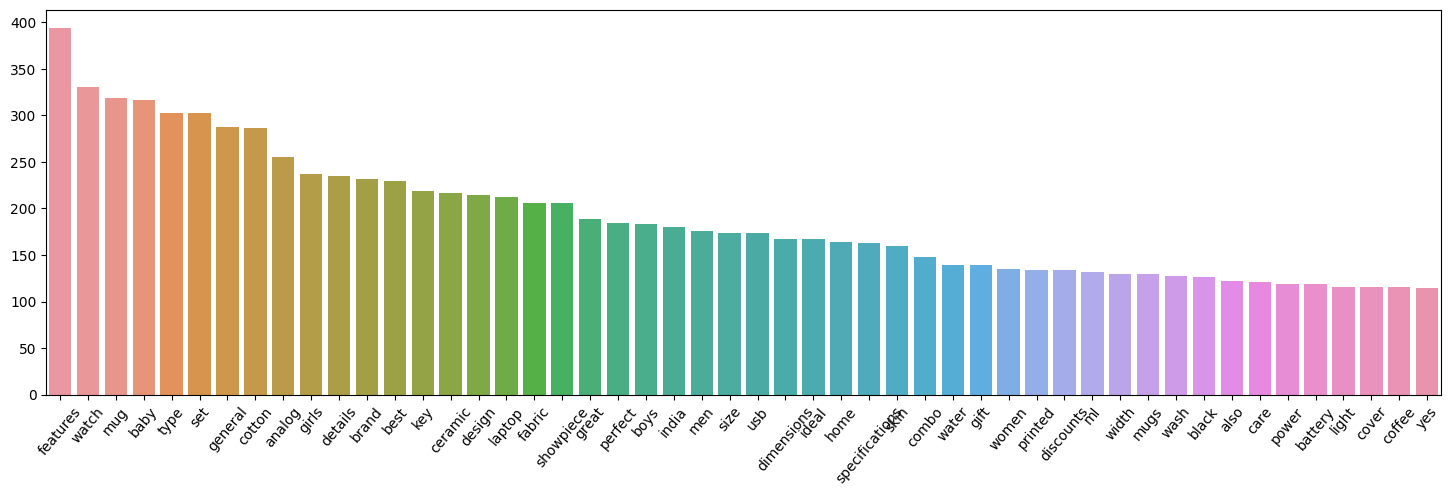

In [95]:
import matplotlib
matplotlib.style.use('default')
import seaborn as sns 
plt.figure(figsize=(18,5))
plt.title('')
sns.barplot(x=list(toto.keys()), y=list(toto.values()))
plt.xticks(rotation=50)
plt.show()

In [91]:
toto = df['description'][36]
toto

'myesquire ceramic burner pot lemongrass liquid air freshener ml illuminate every corner living room style home fragrance electric burner combo fragrance brought myesquire unique useful value money home decoration fragrance unique combo contains aroma burner accessories ready use put small amount tea spoon aroma oil bowl surface light tea light minutes oil heats fragrance spread room set enjoy captivating aroma keep away children surface becomes hot illuminate every corner living room style home fragrance electric burner combo fragrance brought myesquire unique useful value money home decoration fragrance unique combo contains aroma burner accessories ready use put small amount tea spoon aroma oil bowl surface light tea light minutes oil heats fragrance spread room set enjoy captivating aroma keep away children surface becomes hot'

# Hugging Faces

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [101]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

In [103]:
df.columns

Index(['product_name', 'product_category_tree', 'description', 'path_file',
       'categ_0'],
      dtype='object')

In [127]:
def preprocess_function_ids(text):
    out = tokenizer(text, truncation=False)
    return out['input_ids']

def preprocess_function_mask(text):
    out = tokenizer(text, truncation=False)
    return out['attention_mask']

In [128]:
df['input_ids'] = df['description'].apply(preprocess_function_ids)
df['attention_mask'] = df['description'].apply(preprocess_function_mask)

{'input_ids': [101, 3145, 2838, 27745, 26572, 20367, 10061, 3239, 7485, 2341, 11002, 18686, 11002, 12260, 5289, 3401, 26572, 20367, 10061, 3239, 7485, 2341, 11002, 11002, 11598, 2015, 2298, 20769, 15222, 2015, 11002, 26572, 20367, 8313, 4183, 2838, 3239, 7485, 2806, 26035, 3384, 3614, 4183, 3084, 2282, 4044, 6298, 8295, 15222, 2015, 11002, 14405, 23277, 19839, 2571, 3424, 22802, 4270, 11552, 10439, 20486, 3401, 5856, 3726, 2188, 4408, 19770, 2594, 5574, 5617, 16524, 3086, 2469, 8954, 8072, 3824, 3239, 7485, 11748, 6651, 14694, 7358, 15299, 4009, 4237, 2034, 2518, 2851, 6160, 4408, 3103, 9938, 2215, 4299, 2204, 2851, 2878, 2088, 4009, 2485, 3944, 3443, 2569, 5312, 6569, 3560, 5053, 2445, 16684, 11204, 3288, 2188, 11552, 11002, 5238, 17736, 2422, 2282, 2131, 2157, 3815, 9325, 13102, 8586, 9031, 2015, 27745, 26572, 20367, 10061, 3239, 7485, 2341, 11002, 2236, 4435, 27745, 2881, 2341, 2828, 3239, 7485, 2171, 10061, 26572, 20367, 2341, 11002, 2275, 6497, 2121, 9646, 14694, 2303, 2640, 26572

In [ ]:
#  preprocess_function(' '.join(my_stopwords))['input_ids']

In [152]:
df['categ_0'] = categ_0_list_num

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [162]:


df_bert = df[['input_ids','attention_mask','categ_0']]

df_bert.columns = ['input_ids','attention_mask','label']

df_train = df_bert.iloc[:950]

df_val = df_bert.iloc[950:]

# df_test = df_bert.iloc[1000:]

In [163]:
from datasets import Dataset

# ds_train = Dataset.from_dict(df_train.to_dict()).with_format("tf") 
# ds_val = Dataset.from_dict(df_val.to_dict()).with_format("tf") 


ds_train = Dataset.from_pandas(df_train)
ds_val = Dataset.from_pandas(df_val)


In [164]:
tf_train_set = ds_train.to_tf_dataset(

    columns=["attention_mask", "input_ids", 'label'],

    shuffle=True,

    batch_size=16,

    collate_fn=data_collator,
)


tf_validation_set = ds_val.to_tf_dataset(

    columns=["attention_mask", "input_ids", 'label'],

    shuffle=True,

    batch_size=16,

    collate_fn=data_collator,
)

In [170]:
from transformers import create_optimizer

import tensorflow as tf

batch_size = 16

num_epochs = 20

batches_per_epoch = 950 // batch_size

total_train_steps = int(batches_per_epoch * num_epochs)

optimizer, schedule = create_optimizer(init_lr=2e-6, num_warmup_steps=0, num_train_steps=total_train_steps)

In [157]:
from transformers import TFAutoModelForSequenceClassification
model = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=7)

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_layer_norm', 'vocab_transform', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_19', 'classifier', 'pre_classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

In [171]:
import tensorflow as tf
model.compile(optimizer=optimizer,
loss='sparse_categorical_crossentropy')

In [173]:
tf_train_set

<PrefetchDataset element_spec={'input_ids': TensorSpec(shape=(None, None), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, None), dtype=tf.int64, name=None), 'labels': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}>

In [172]:
model.fit(x=tf_train_set, validation_data=tf_validation_set, epochs=20)

Epoch 1/20
60/60 [==============================] - 10s 110ms/step - loss: 1.8008 - val_loss: 1.9459
Epoch 2/20
60/60 [==============================] - 6s 100ms/step - loss: 1.8333 - val_loss: 1.9459
Epoch 3/20
60/60 [==============================] - 6s 98ms/step - loss: 1.8169 - val_loss: 1.9459
Epoch 4/20
60/60 [==============================] - 6s 99ms/step - loss: 1.7519 - val_loss: 1.9459
Epoch 5/20
60/60 [==============================] - 6s 101ms/step - loss: 1.6943 - val_loss: 1.9459
Epoch 6/20
60/60 [==============================] - 6s 98ms/step - loss: 1.7104 - val_loss: 1.9459
Epoch 7/20
60/60 [==============================] - 6s 100ms/step - loss: 1.7147 - val_loss: 1.9459
Epoch 8/20
60/60 [==============================] - 6s 100ms/step - loss: 1.7755 - val_loss: 1.9459
Epoch 9/20
60/60 [==============================] - 6s 97ms/step - loss: 1.8435 - val_loss: 1.9459
Epoch 10/20
60/60 [==============================] - 6s 100ms/step - loss: 1.8455 - val_loss: 1.9459
Ep